# Product Defects

You are in charge of monitoring the number of products from a specific factory. You've been told that the number of defects on a given day follows the Poisson distribution with the rate parameter (lambda) equal to 7. You're new here, so you want to get a feel for what it means to follow the Poisson(7) distribution. You remember that the Poisson distribution is special because the rate parameter represents the expected value of the distribution, so in this case, the expected value of the Poisson(7) distribution is 7 defects per day.

You will investigate certain attributes of the Poisson(7) distribution to get an intuition for how many defective objects you should expect to see in a given amount of time. You will also practice and apply what you know about the Poisson distribution on a practice data set that you will simulate yourself.

## Distribution in Theory

1. Create a variable called `lam` that represents the rate parameter of our distribution.

In [13]:
import scipy.stats as stats
import numpy as np
import seaborn as sns


<Axes: ylabel='Count'>

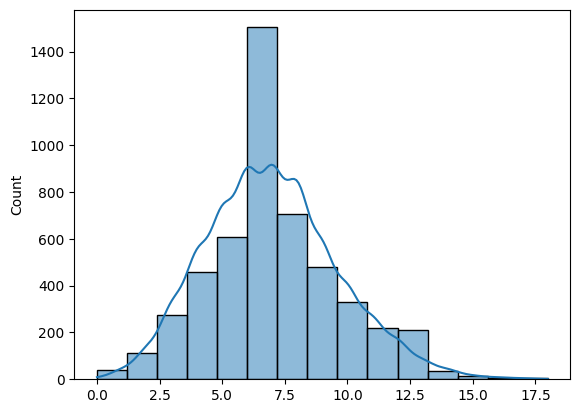

In [44]:
sns.histplot(stats.poisson.rvs(7, size=5000), bins=15, kde=True)

In [ ]:
## Task 1:
lam = 7

2. You know that the rate parameter of a Poisson distribution is equal to the expected value. So in our factory, the rate parameter would equal the expected number of defects on a given day. You are curious about how often we might observe the exact expected number of defects.

   Calculate and print the probability of observing exactly `lam` defects on a given day.

In [10]:
## Task 2:
print((stats.poisson.pmf(7, lam)*100).round(2))

14.9


3. Our boss said that having 4 or fewer defects on a given day is an exceptionally good day. You are curious about how often that might happen.

   Calculate and print the probability of having one of those days.

In [11]:
## Task 3:
print((stats.poisson.cdf(4, lam)*100).round(2))

17.3


4. On the other hand, our boss said that having more than 9 defects on a given day is considered a bad day.

   Calculate and print the probability of having one of these bad days.

In [12]:
## Task 4:
print(((1-stats.poisson.cdf(9, lam))*100).round(2))

16.95


## Distribution in Practice

5. You've familiarized yourself a little bit about how the Poisson distribution works in theory by calculating different probabilities. But let's look at what this might look like in practice.

   Create a variable called `year_defects` that has 365 random values from the Poisson distribution.

In [45]:
## Task 5:
year_defects = stats.poisson.rvs(7, size=365)

6. Let's take a look at our new dataset. Print the first 20 values in this dataset.

In [46]:
## Task 6:
print(year_defects[:19])

[ 8  4  7  6  5  3  9  8  9  3  7  6 12  8  7  5  6  3 11]


7. If we expect 7 defects on a given day, what is the total number of defects we would expect over 365 days?

   Calculate and print this value to the output terminal.

In [47]:
## Task 7:
print(365*7)

2555


8. Calculate and print the total sum of the dataset `year_defects`. How does this compare to the total number of defects we expected over 365 days?

In [48]:
## Task 8:
print(year_defects.sum())

2601


9. Calculate and print the average number of defects per day from our simulated dataset.

   How does this compare to the expected average number of defects each day that we know from the given rate parameter of the Poisson distribution?

In [50]:
## Task 9:
year_defects.mean().round(3)

7.126

In [58]:
print(f'The difference between the expected value and the observed value: {(((year_defects.sum()-365*7)/(365*7)) * 100).round(2)}%')

The difference between the expected value and the observed value: 1.8%


In [59]:
print(f'The difference between the expected mean value and the observed mean value: {(((year_defects.mean()-7)/(7)) * 100).round(2)}%')

The difference between the expected mean value and the observed mean value: 1.8%


10. You’re worried about what the highest amount of defects in a single day might be because that would be a hectic day.

    Print the maximum value of year_defects

In [60]:
## Task 10:
print(year_defects.max())

15


11. Wow, it would probably be super busy if there were that many defects on a single day. Hopefully, it is a rare event!

    Calculate and print the probability of observing that maximum value or more from the Poisson(7) distribution.

In [67]:
## Task 11:
print(f' The probability that the maximum defects per day is {year_defects.max()} is {(stats.poisson.pmf(year_defects.max(), lam)*100).round(3)}%') 


 The probability that the maximum defects per day is 15 is 0.331%


## Extra

12. Congratulations! At this point, you have now explored the Poisson distribution and even worked with some simulated data. We have a couple of extra tasks if you would like an extra challenge. Feel free to try them out or move onto the next topic!

    Let's say we want to know how many defects in a given day would put us in the 90th percentile of the Poisson(7) distribution. One way we could calculate this is by using the following method:
    
    ```py
    stats.poisson.ppf(percentile, lambda)
    ```
    
    `percentile` is equal to the desired percentile (a decimal between 0 and 1), and `lambda` is the lambda parameter of the Poisson distribution. This function is essentially the inverse of the CDF.
    
    Use this method to calculate and print the number of defects that would put us in the 90th percentile for a given day. In other words, on 90% of days, we will observe fewer defects than this number.

In [71]:
## Task 12:
perc_90 = stats.poisson.ppf(0.90, lam)
perc_90

10.0

13. Now let's see what proportion of our simulated dataset `year_defects` is greater than or equal to the number we calculated in the previous step.

    By definition of a percentile, we would expect 1 - .90, or about 10% of days to be in this range.
    
    To calculate this:
    
     1) Count the number of values in the dataset that are greater than or equal to the 90th percentile value.
     
     2) Divide this number by the length of the dataset.

In [74]:
## Task 13:
count_higher_than_90_percentile = len(year_defects[year_defects > perc_90])
count_higher_than_90_percentile

42

In [75]:
count_higher_than_90_percentile/len(year_defects)

0.11506849315068493